<a href="https://colab.research.google.com/github/luccidx/Pneumonia_Detection_using_X-Ray/blob/main/Pnemonia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pnemonia Detection Using X-Ray Image Classification

In [60]:
# importing data from kaggle so we first install kaggle
! pip install -q kaggle

In [61]:
from google.colab import files

In [62]:
# upload the Kaggle.json API Key file from your account to link with Kaggle
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"gsantoshkumar","key":"e35e8607288c8b9f881837286e5068ff"}'}

In [63]:
 ! mkdir -p ~/.kaggle

In [64]:
! cp kaggle.json ~/.kaggle/

In [67]:
! chmod 600 ~/.kaggle/kaggle.json 
#changing the permission from kaggle to use dataset 

In [68]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
# upload dataset API command 

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
ls

 chest_xray/               'kaggle (1).json'   person103_bacteria_489.jpeg
 chest-xray-pneumonia.zip   kaggle.json        sample_data/


In [70]:
! unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [78]:
ls

 chest_xray/               'kaggle (1).json'   person103_bacteria_489.jpeg
 chest-xray-pneumonia.zip   kaggle.json        sample_data/


In [79]:
test_Pneumonia_dir = "./chest_xray/test/PNEUMONIA"
train_Pneumonia_dir = "./chest_xray/train/PNEUMONIA"
validation_Pneumonia_dir = "./chest_xray/val/PNEUMONIA"

test_Normal_dir = "./chest_xray/test/NORMAL"
train_Normal_dir = "./chest_xray/train/NORMAL"
validation_Normal_dir = "./chest_xray/val/NORMAL"

In [80]:
import os

In [81]:
print(len(os.listdir(train_Pneumonia_dir)))
print(len(os.listdir(train_Normal_dir)))

3875
1341


In [82]:
Pneumonia_images = os.listdir(train_Pneumonia_dir)
Pneumonia_images

['person1598_bacteria_4197.jpeg',
 'person23_bacteria_105.jpeg',
 'person988_virus_1666.jpeg',
 'person897_bacteria_2822.jpeg',
 'person770_virus_1398.jpeg',
 'person1535_bacteria_4017.jpeg',
 'person1689_bacteria_4474.jpeg',
 'person1429_virus_2443.jpeg',
 'person59_bacteria_281.jpeg',
 'person596_bacteria_2449.jpeg',
 'person1770_bacteria_4614.jpeg',
 'person265_bacteria_1236.jpeg',
 'person26_bacteria_122.jpeg',
 'person1509_virus_2621.jpeg',
 'person1158_virus_1943.jpeg',
 'person749_bacteria_2652.jpeg',
 'person544_virus_1074.jpeg',
 'person646_virus_1227.jpeg',
 'person1468_bacteria_3822.jpeg',
 'person298_virus_618.jpeg',
 'person1320_bacteria_3352.jpeg',
 'person62_bacteria_298.jpeg',
 'person563_bacteria_2333.jpeg',
 'person768_bacteria_2672.jpeg',
 'person280_virus_577.jpeg',
 'person370_virus_752.jpeg',
 'person598_bacteria_2453.jpeg',
 'person19_bacteria_59.jpeg',
 'person17_bacteria_56.jpeg',
 'person378_virus_761.jpeg',
 'person1121_virus_1846.jpeg',
 'person1084_bacteria

In [83]:
from PIL import Image

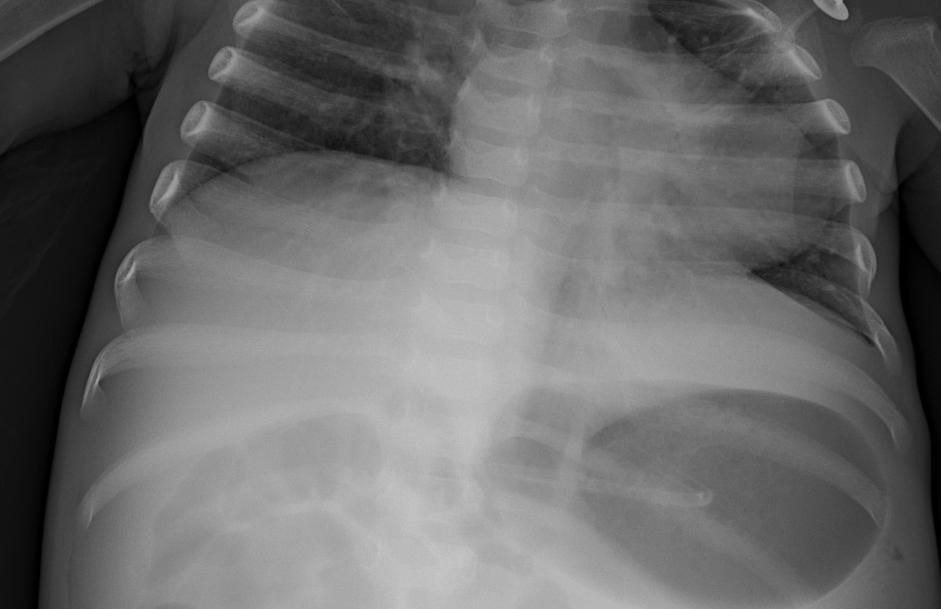

In [84]:
Image.open(train_Pneumonia_dir +"/person1142_virus_1892.jpeg") #virus 

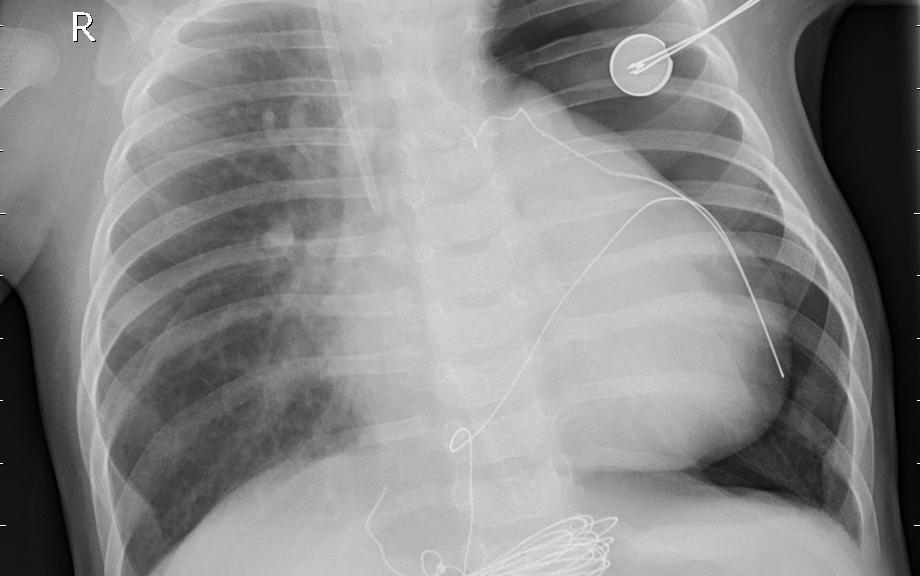

In [85]:
Image.open(train_Pneumonia_dir +"/person614_bacteria_2483.jpeg") #bacteria

In [86]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [87]:
train_dir = "./chest_xray/train"
data_gen = ImageDataGenerator(1/255.0)

In [88]:
train_generator = data_gen.flow_from_directory(train_dir, target_size=(150, 150), class_mode="categorical" )

Found 5216 images belonging to 2 classes.


In [89]:
# checking Indecies of categorical classifcation in the train data
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [90]:
# building the model

model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape = (150, 150, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, activation="relu"))
#output layer
model.add(Dense(2, activation="softmax"))
model.compile(loss = "categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])


In [91]:
H = model.fit(train_generator, epochs=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
163/163 [==============================] - 50s 306ms/step - loss: 2.1721 - accuracy: 0.7711
Epoch 2/20
163/163 [==============================] - 50s 305ms/step - loss: 0.3083 - accuracy: 0.8859
Epoch 3/20
163/163 [==============================] - 49s 302ms/step - loss: 0.2294 - accuracy: 0.9195
Epoch 4/20
163/163 [==============================] - 51s 315ms/step - loss: 0.1690 - accuracy: 0.9436
Epoch 5/20
163/163 [==============================] - 52s 318ms/step - loss: 0.1586 - accuracy: 0.9513
Epoch 6/20
163/163 [==============================] - 52s 317ms/step - loss: 0.1567 - accuracy: 0.9563
Epoch 7/20
163/163 [==============================] - 53s 324ms/step - loss: 0.1313 - accuracy: 0.9641
Epoch 8/20
163/163 [==============================] - 48s 296ms/step - loss: 0.1412 - accuracy: 0.9663
Epoch 9/20
163/163 [==============================] - 50s 308ms/step - loss: 0.1017 - accuracy: 0.9678
Epoch 10/20
163/163 [==============================] - 49s 298ms/step - l

In [92]:
# Accuracy of max 97 percent is seen from the trained model

In [93]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [94]:
from google.colab import files

In [95]:
files.upload()

Saving person103_bacteria_489.jpeg to person103_bacteria_489 (1).jpeg


{'person103_bacteria_489.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xc0\x00\x0b\x08\x02\xe8\x03\xe8\x01\x01\x11\x00\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\x

In [96]:
# we upload a pneumonia detected x-ray from test-data set to check the prediction 

image = load_img("person103_bacteria_489.jpeg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis = 0)

In [97]:
model.predict_classes(image)
# array of 1 is PNEUMONIA and can be checked below in class_indices

array([1])

In [98]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}